In [1]:
from kaggle_handler import handler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot

plt.style.use('ggplot')

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

# Loading Dataset
- Managing Null values if any
- Looking for negetive (-) or Zero (0) values using .describe() function (As it not acceptable in 'box-cox' transformation)

In [3]:
Assets = handler()

Directory 'Assets' already exists.
Datasets already exist in Assets folder
['Titanic-Dataset.csv', 'GenZ_DatingApp_Data.csv', 'concrete_data.csv']
 Change Add_more parameter to download more datasets


In [4]:
df = pd.read_csv('Assets/concrete_data.csv')
df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Graphical Analysis of Distribution of Dataset

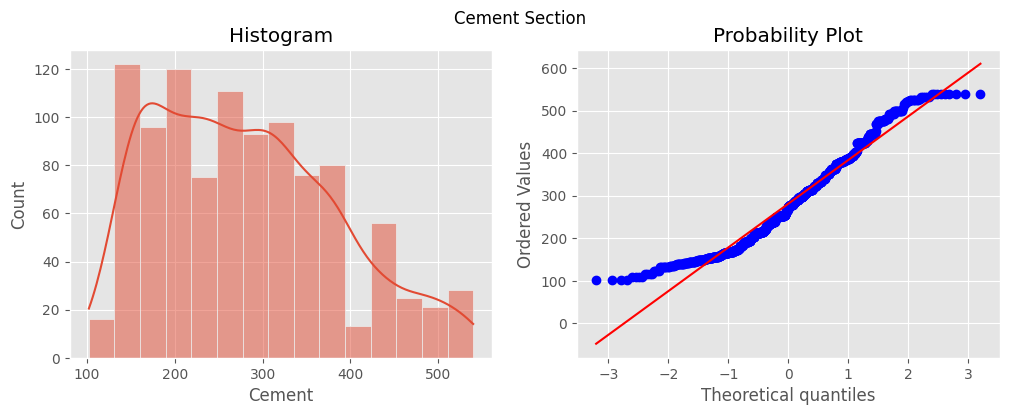

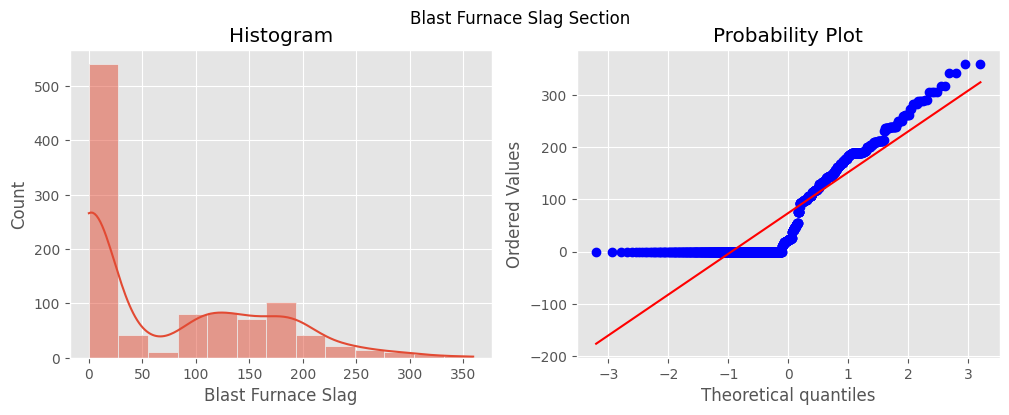

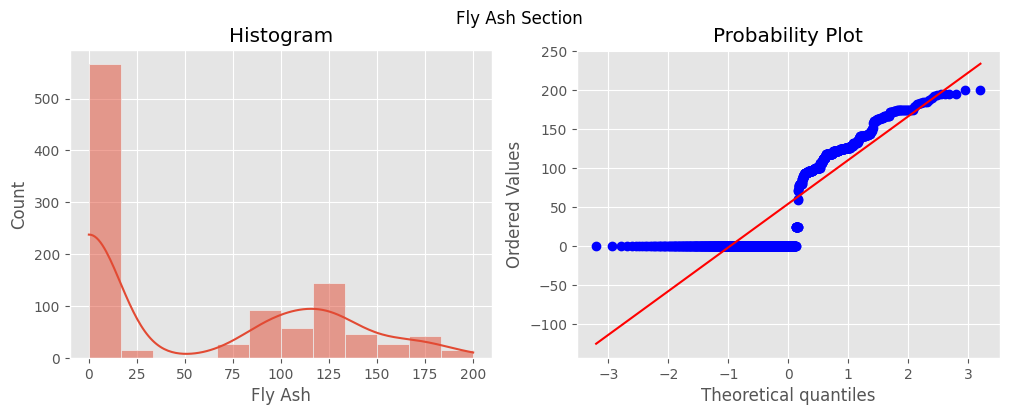

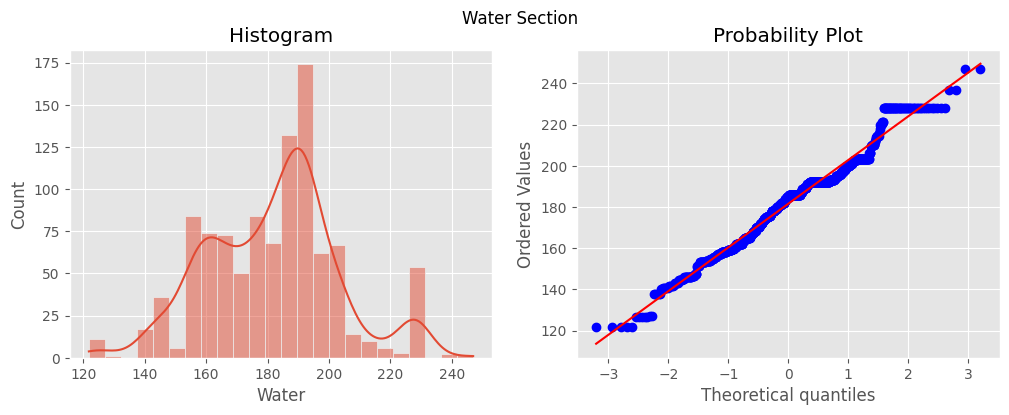

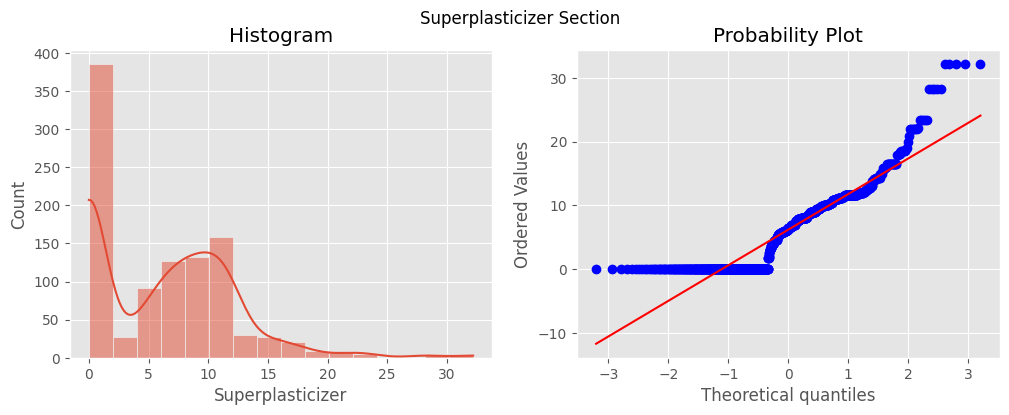

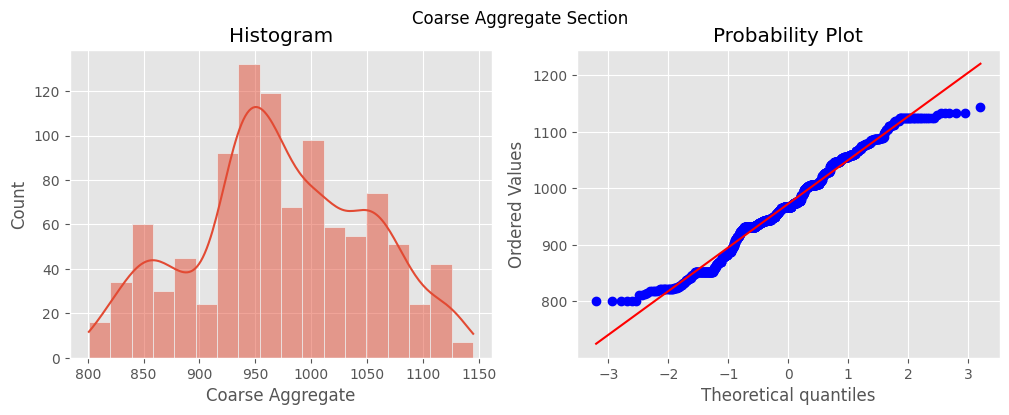

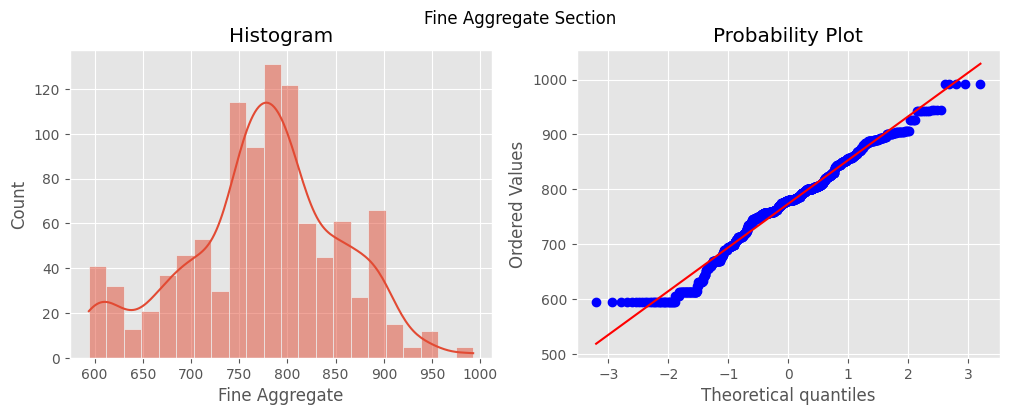

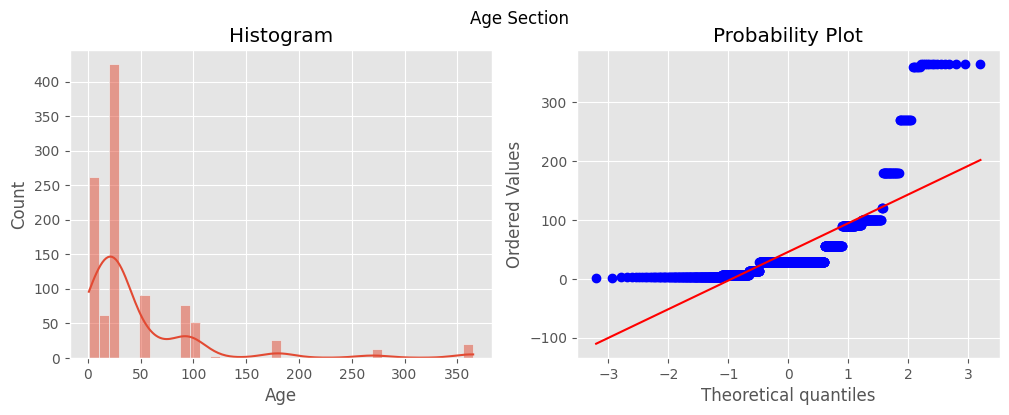

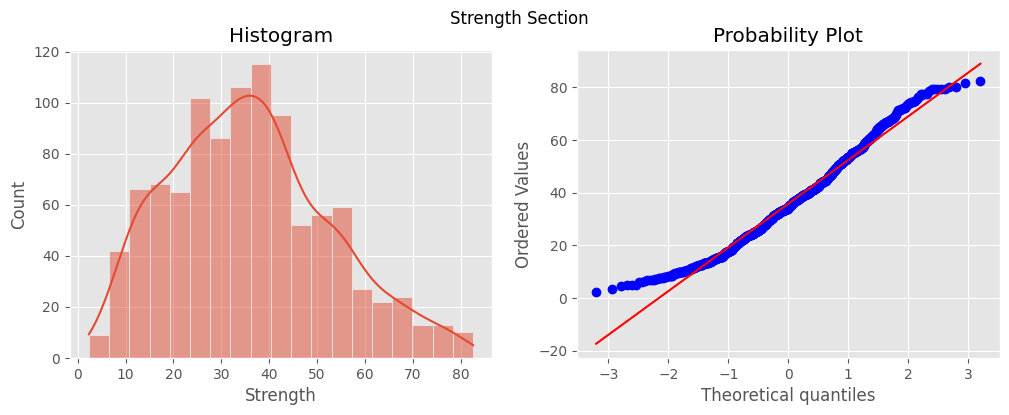

In [7]:
for coll in df.columns:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.histplot(df[coll], kde=True)
    plt.title("Histogram")

    plt.subplot(122)
    probplot(df[coll],dist='norm',plot=plt)
    plt.suptitle(f'{coll} Section')
    plt.show()

# Train Test Split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Strength']),
                                                 df['Strength'],
                                                 test_size=.2)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((824, 8), (824,), (206, 8), (206,))

# Graphical Analysis of Distribution of Traning Dataset

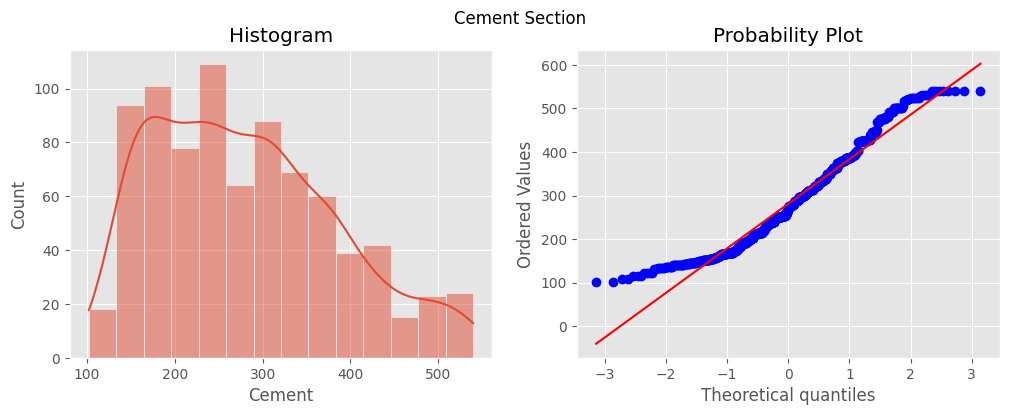

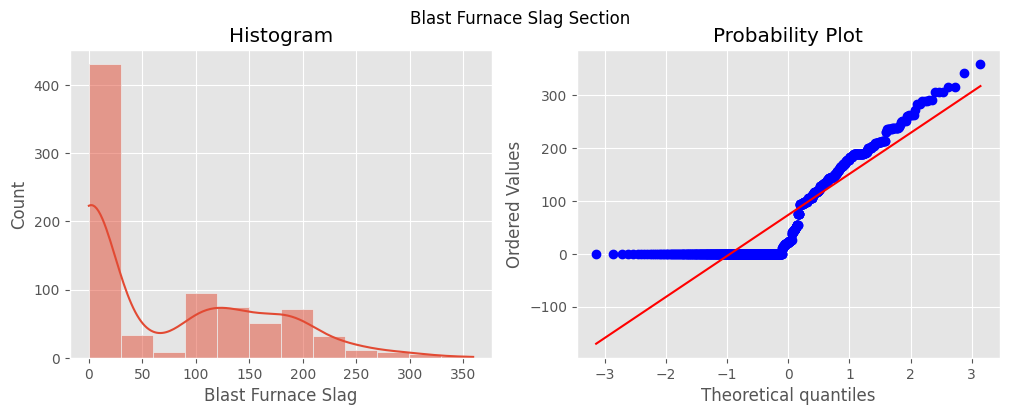

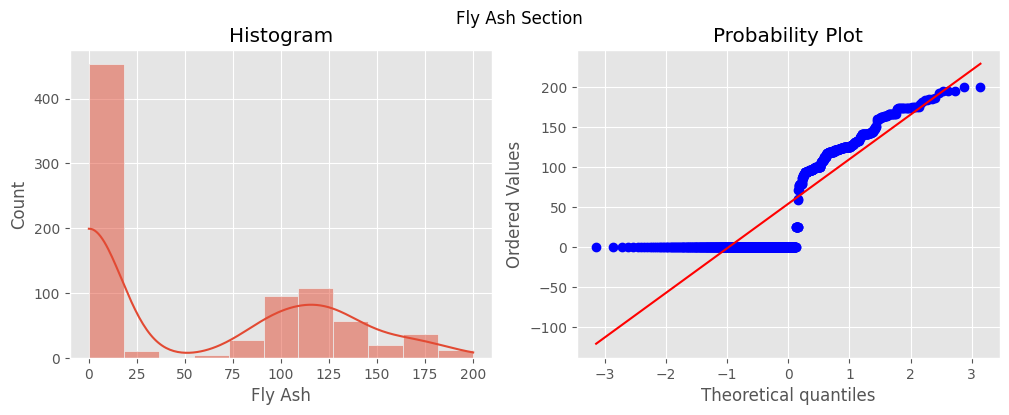

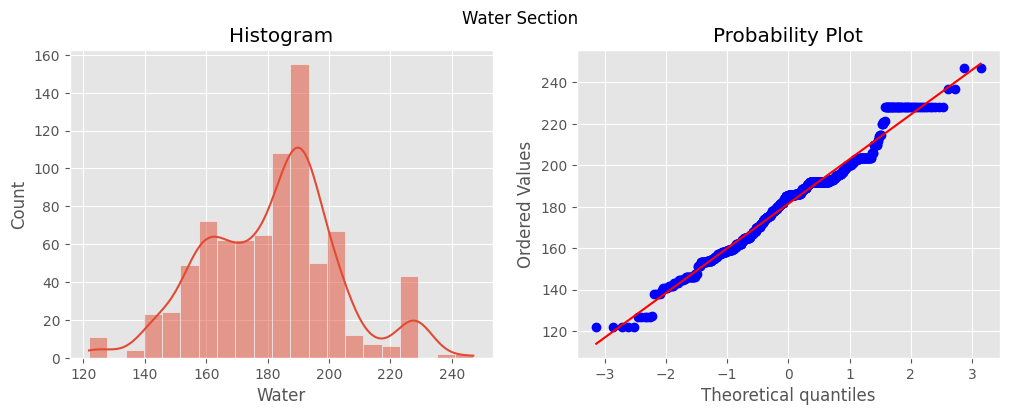

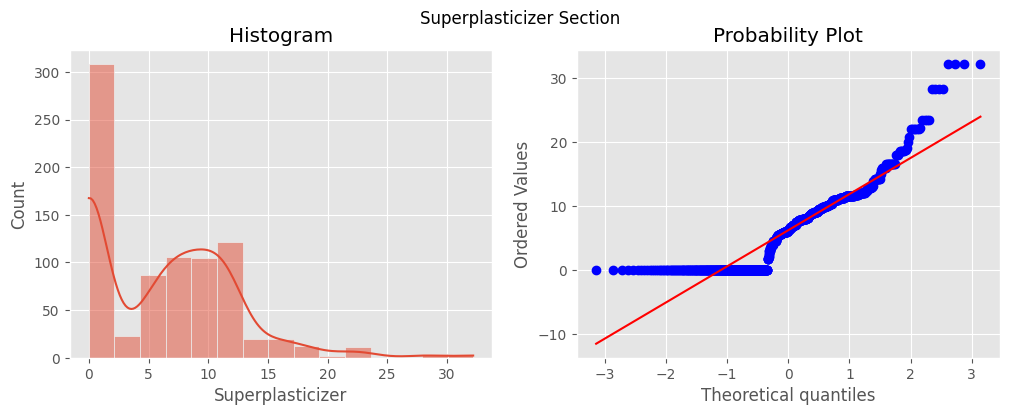

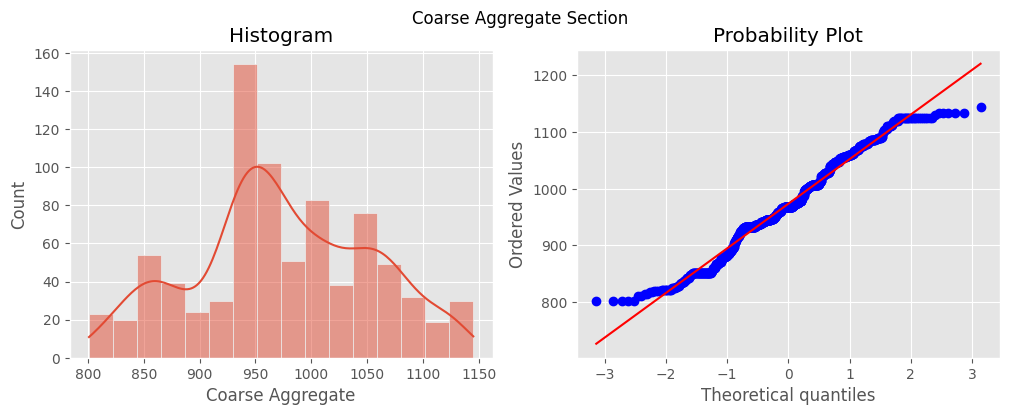

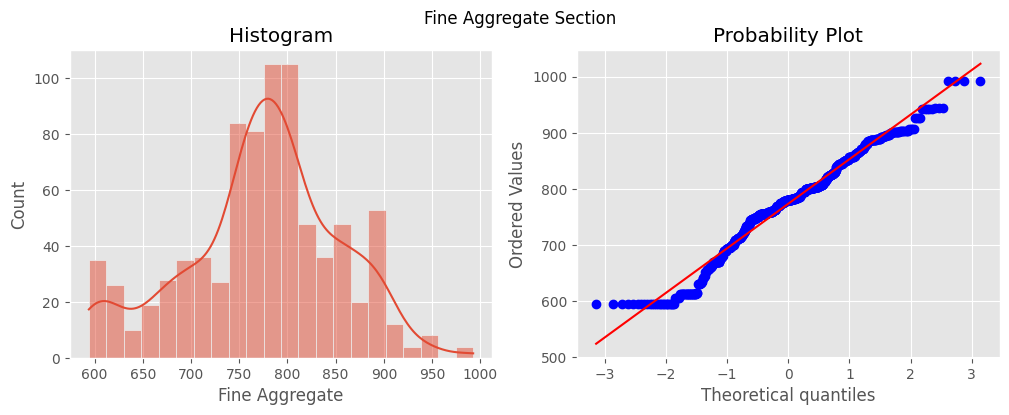

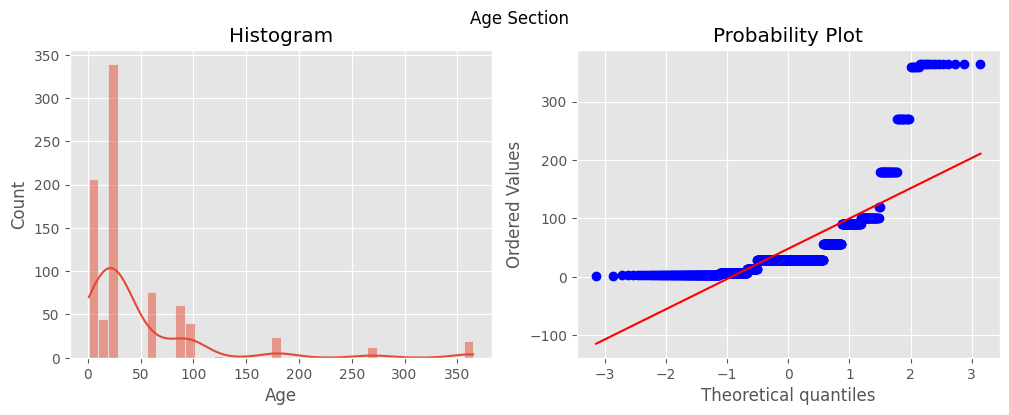

In [9]:
for coll in X_train.columns:
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.histplot(X_train[coll], kde=True)
    plt.title("Histogram")

    plt.subplot(122)
    probplot(X_train[coll],dist='norm',plot=plt)
    plt.suptitle(f'{coll} Section')
    plt.show()

# Trening Model and r2_score Of The Treaning Dataset

In [10]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
r2_score(y_true=y_test,y_pred=y_pred)

0.6115506662361936

# Cross Validating Treaning Dataset Score Results

In [11]:
lr = LinearRegression()
cross_val_score(lr, X_train, y_train,cv=10).mean()

np.float64(0.6017605498204801)

# Box-Cox Transformation
- Handling Xero (0) values

In [12]:
pt = PowerTransformer(method='box-cox')
X_train_trf = pt.fit_transform(X_train+.0000000001)
X_test_trf = pt.transform(X_test+.0000000001)

# Graphical Analysis of Distribution of Box-Cox Transformed Dataset

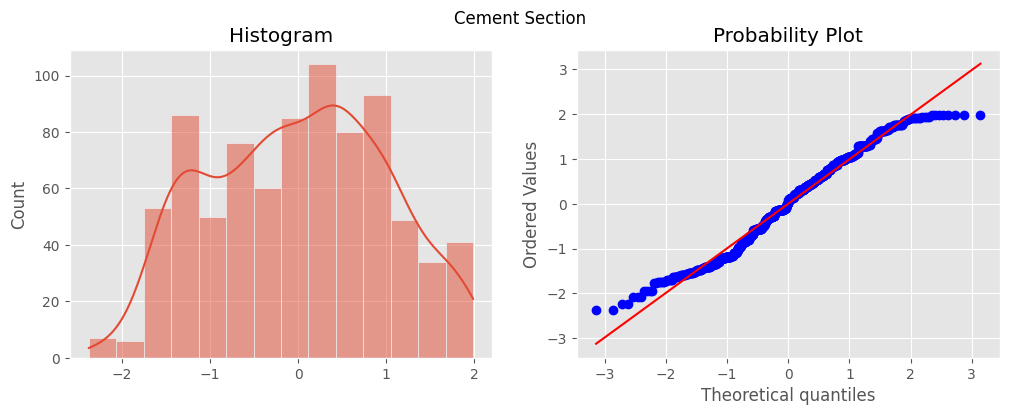

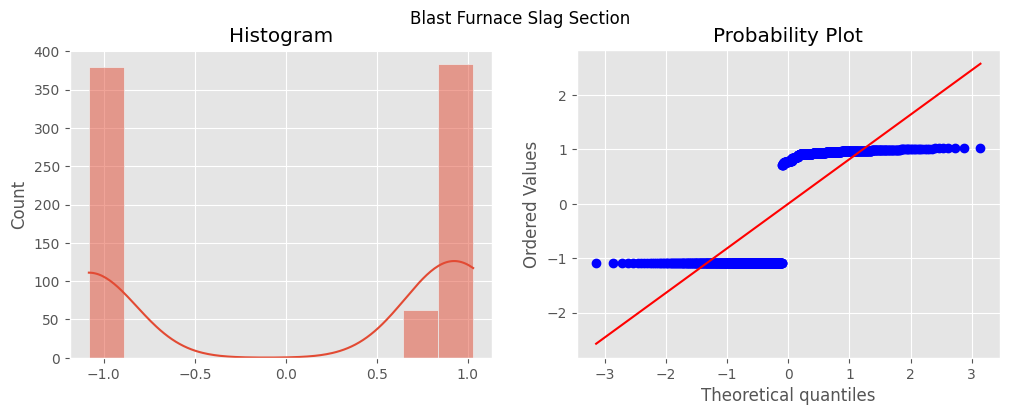

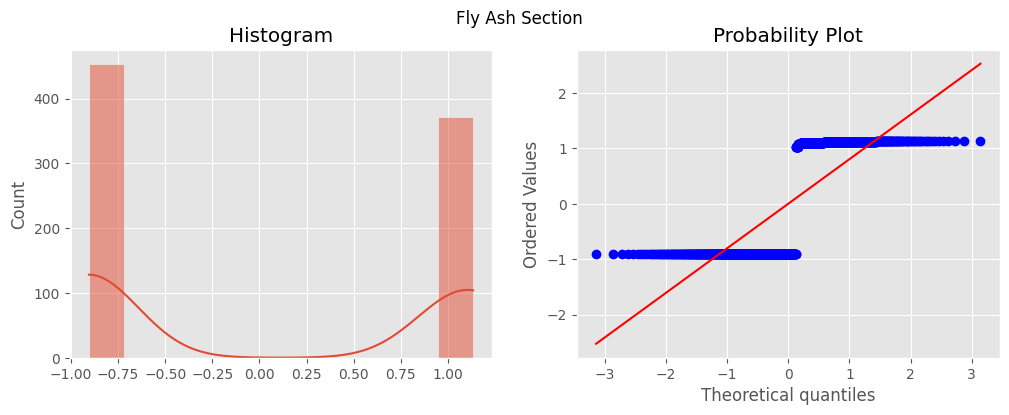

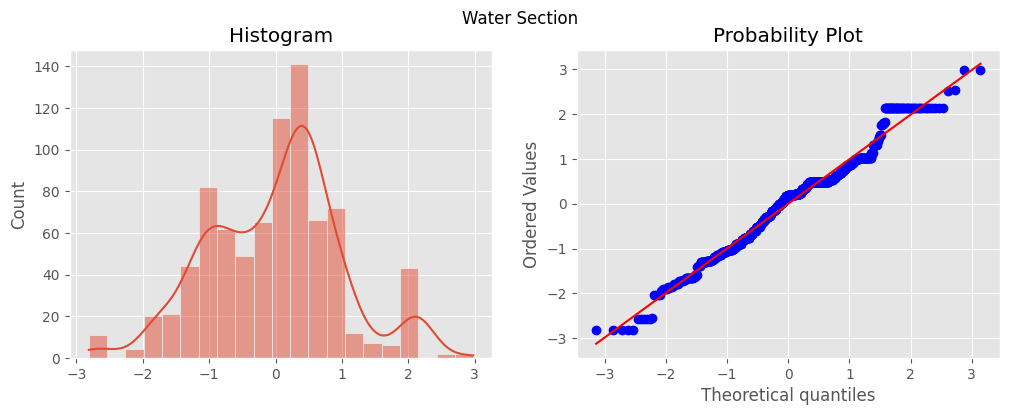

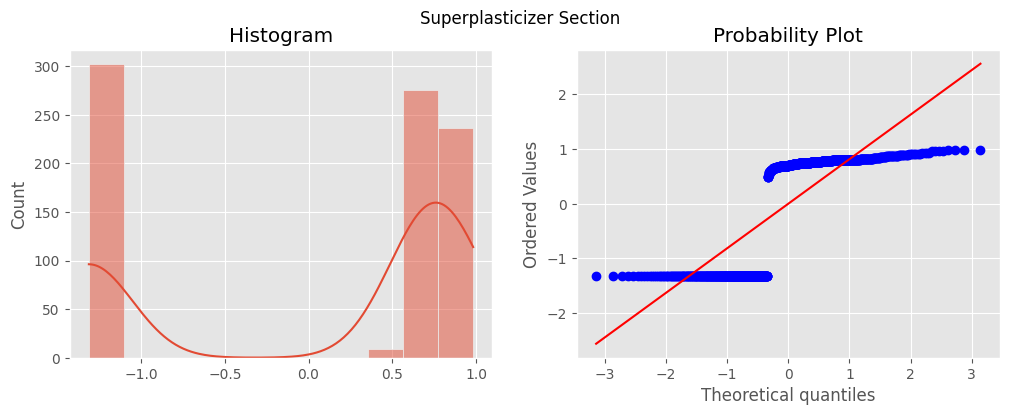

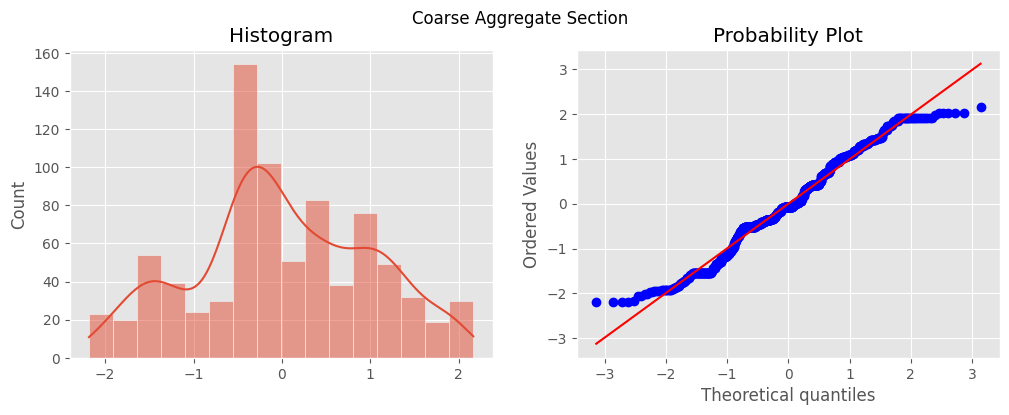

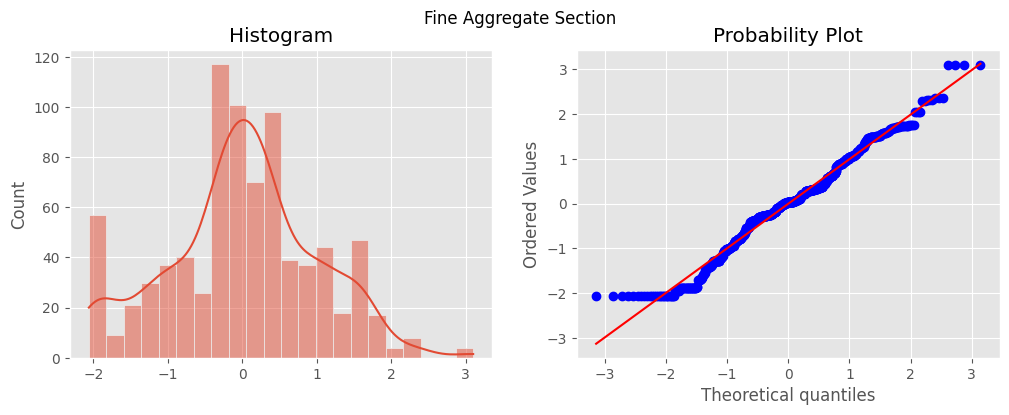

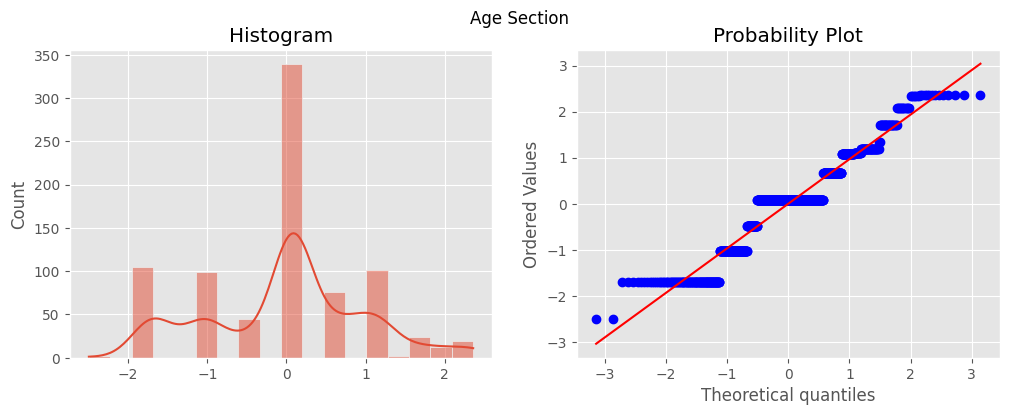

In [13]:
for i, coll in enumerate(X_train.columns):
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.histplot(X_train_trf[:,i], kde=True)
    plt.title("Histogram")

    plt.subplot(122)
    probplot(X_train_trf[:,i],dist='norm',plot=plt)
    plt.suptitle(f'{coll} Section')
    plt.show()

# Trening Model and r2_score Of The Box-Cox Transformed Dataset

In [14]:
lr = LinearRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)
r2_score(y_true=y_test,y_pred=y_pred)

0.8060521879084664

# Cross Validating Box-Cox Transformed Dataset Score Results

In [15]:
lr = LinearRegression()
cross_val_score(lr, X_train_trf, y_train,cv=10).mean()

np.float64(0.7917520390549356)

# Yeo-Johnson Transformation

In [16]:
pt = PowerTransformer(method='yeo-johnson')
X_train_trf = pt.fit_transform(X_train)
X_test_trf = pt.transform(X_test)

# Graphical Analysis of Distribution of Yeo-Johnson Transformed Dataset

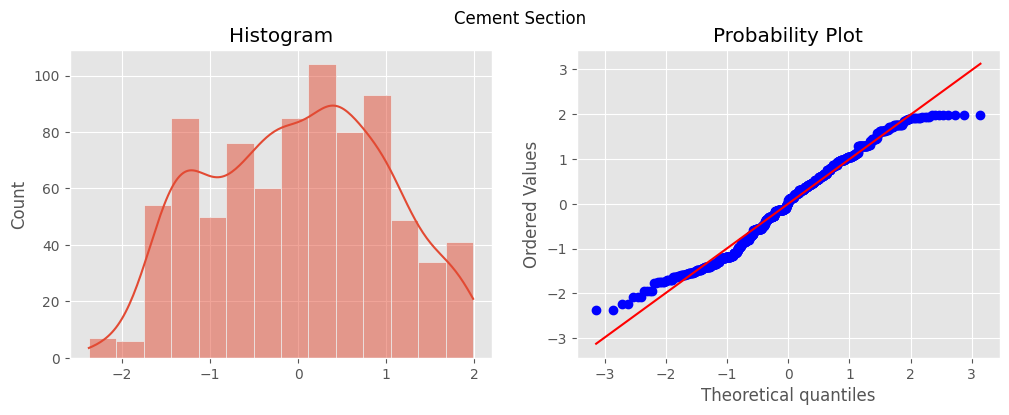

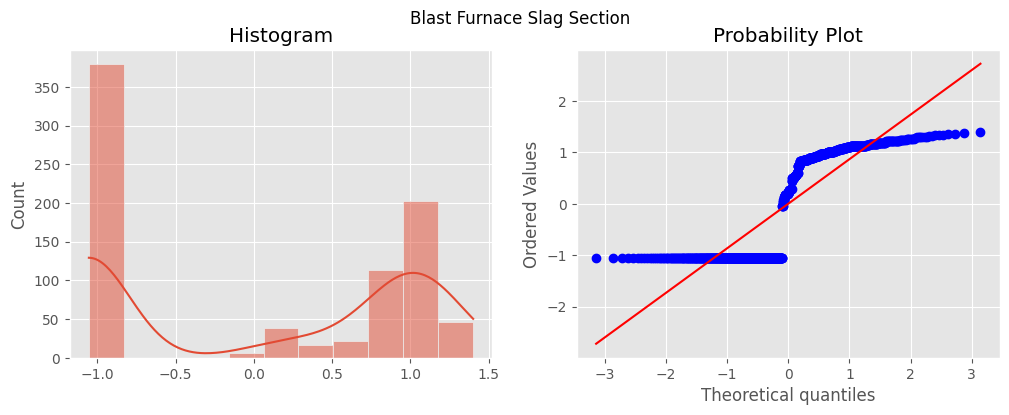

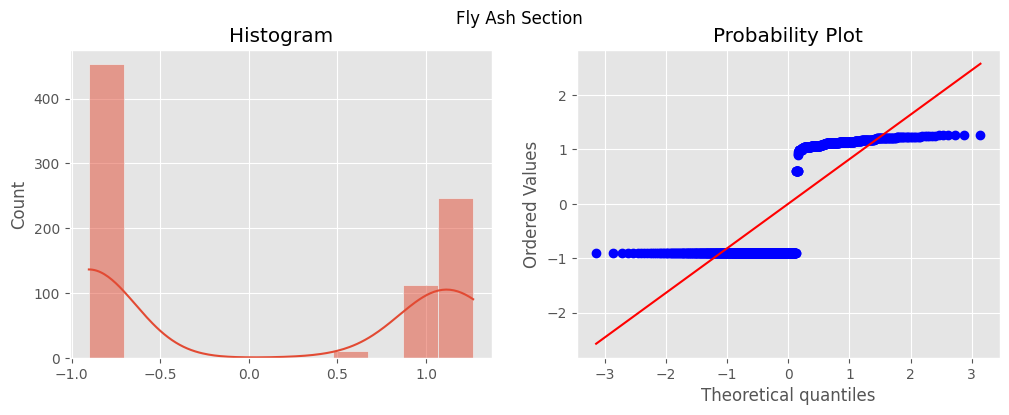

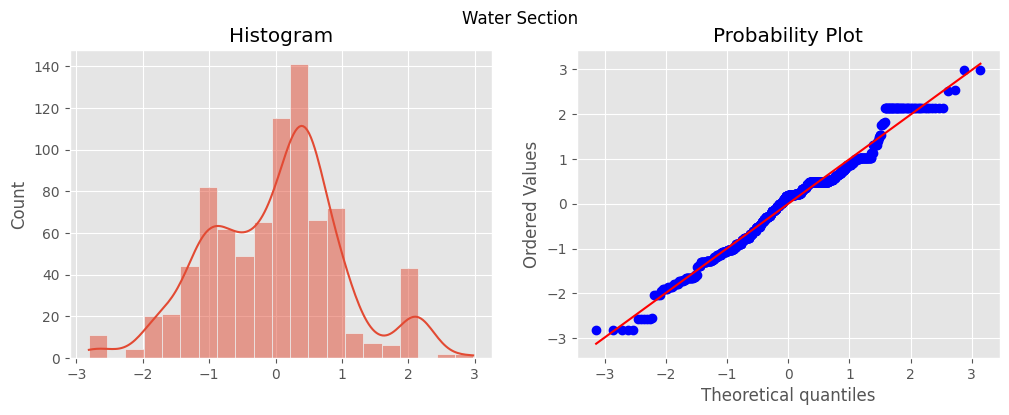

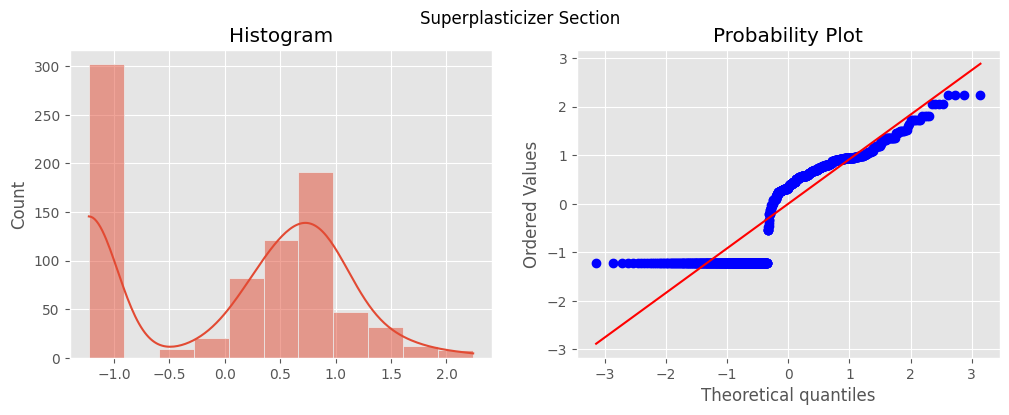

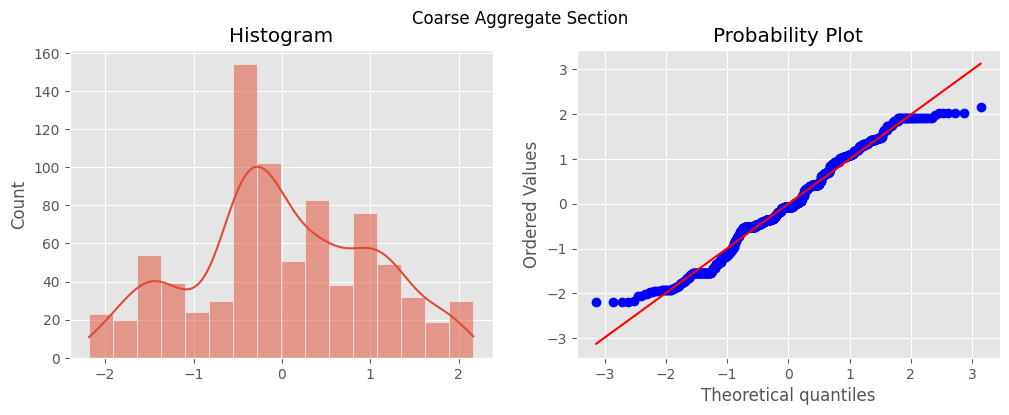

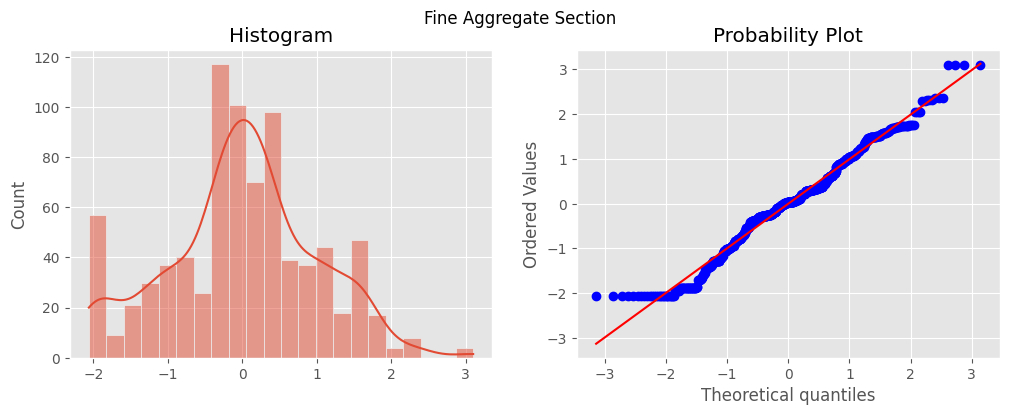

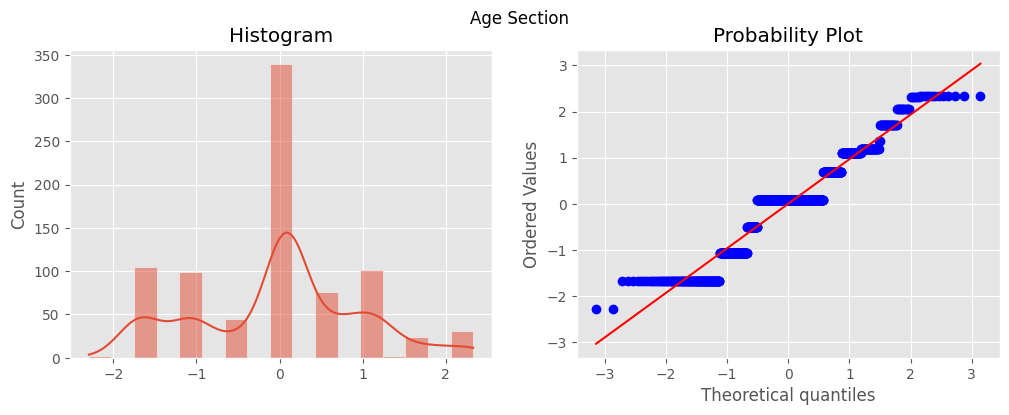

In [17]:
for i, coll in enumerate(X_train.columns):
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    sns.histplot(X_train_trf[:,i], kde=True)
    plt.title("Histogram")

    plt.subplot(122)
    probplot(X_train_trf[:,i],dist='norm',plot=plt)
    plt.suptitle(f'{coll} Section')
    plt.show()

# Trening Model and r2_score Of The Yeo-Johnson Transformed Dataset

In [18]:
lr = LinearRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)
r2_score(y_true=y_test,y_pred=y_pred)

0.813690687924548

# Cross Validating Yeo-Johnson Transformed Dataset Score Results

In [19]:
lr = LinearRegression()
cross_val_score(lr, X_train_trf, y_train,cv=10).mean()

np.float64(0.7958371742522952)